In [1]:
from scipy.io import wavfile
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
wav = r".\v-09-10-11-58.wav" # Original file
(file_dir, file_id) = os.path.split(wav)

print("Path : ", file_dir)
print("Name : ", file_id)

Path :  .
Name :  v-09-10-11-58.wav


In [3]:
sample_rate, data = wavfile.read(wav) # sr : sampling rate, x : wave data array

print("Sample rate:{0}, data size:{1}, duration:{2} seconds".format(sample_rate,data.shape,len(data)/sample_rate))

Sample rate:44100, data size:(414720,), duration:9.404081632653062 seconds


In [4]:
max_int16 = 2**15
data = data / max_int16

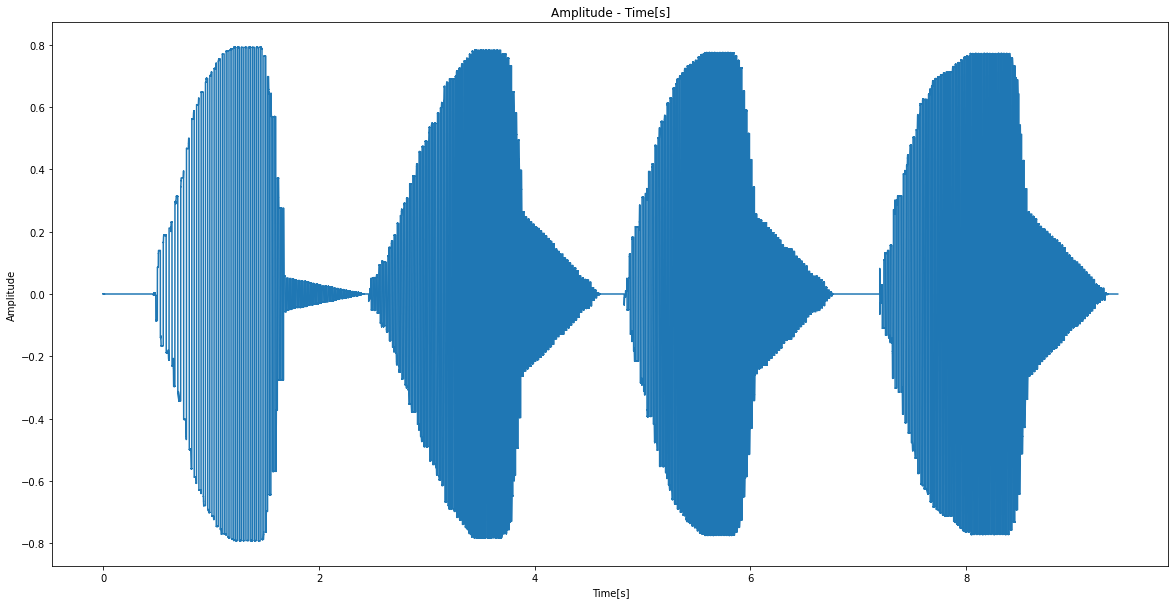

In [5]:
time = np.linspace(0, len(data)/sample_rate, len(data))

plt.figure(figsize=(20,10))
plt.plot(time, data)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("Amplitude - Time[s]")
plt.show()

In [6]:
sample_rate, data

(44100,
 array([ 3.05175781e-05, -9.15527344e-05,  1.22070312e-04, ...,
        -9.15527344e-05,  9.15527344e-05, -9.15527344e-05]))

In [7]:
np.shape(data)

(414720,)

In [8]:
from scipy import signal

R = 1000

secs = len(data)/sample_rate # Time length(second) in signal X
samps = int(secs*R)     # Number of samples to downsample
downsampled = signal.resample(data, samps)

downsampled_poly = signal.resample_poly(data, R, sample_rate, padtype='mean')

In [9]:
downsampled

array([-0.00068898,  0.00068717, -0.00068711, ...,  0.0006881 ,
       -0.0006878 ,  0.00068695])

In [10]:
np.shape(downsampled), np.shape(downsampled_poly)

((9404,), (9405,))

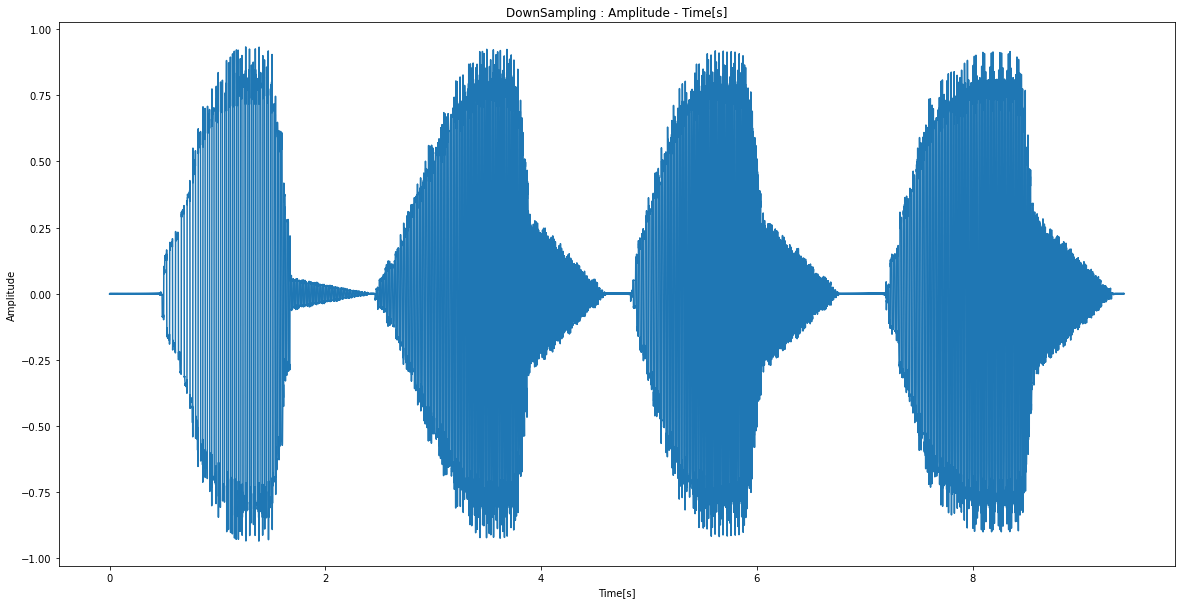

In [11]:
timeDown = np.linspace(0, len(downsampled)/R, len(downsampled))

plt.figure(figsize=(20,10))
plt.plot(timeDown, downsampled)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("DownSampling : Amplitude - Time[s]")
plt.show()

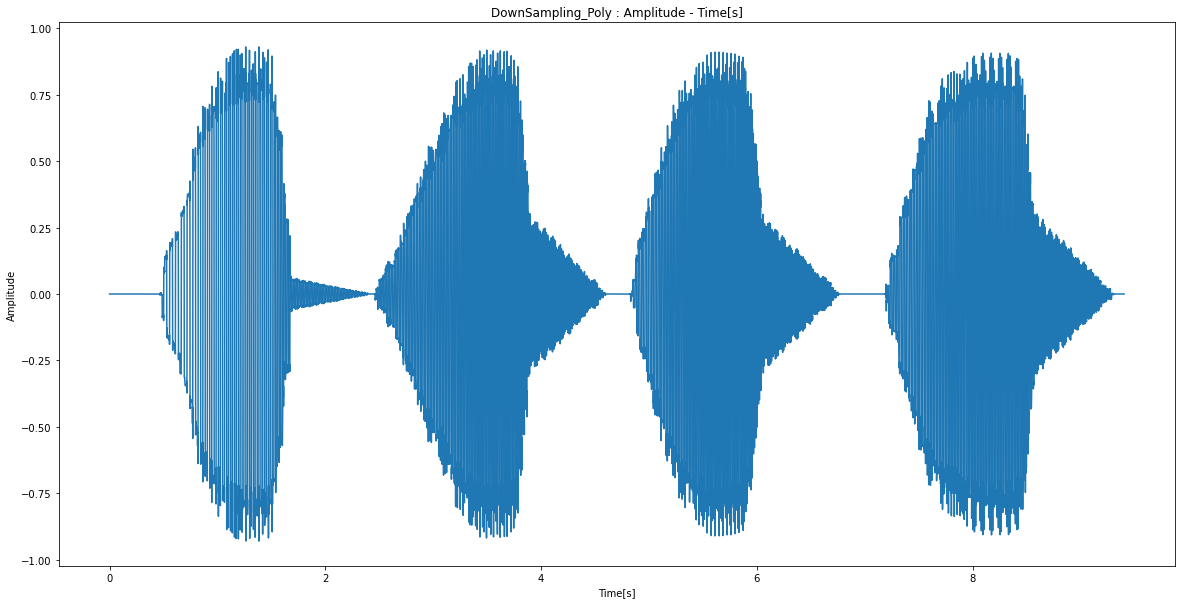

In [12]:
timeDown_poly = np.linspace(0, len(downsampled_poly)/R, len(downsampled_poly))

plt.figure(figsize=(20,10))
plt.plot(timeDown_poly , downsampled_poly )
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("DownSampling_Poly : Amplitude - Time[s]")
plt.show()

In [13]:
print("Sample rate:{0}, data size:{1}, duration:{2} seconds".format(R,downsampled.shape,len(downsampled)/R))

Sample rate:1000, data size:(9404,), duration:9.404 seconds


Text(0.5, 0, 'Time[s]')

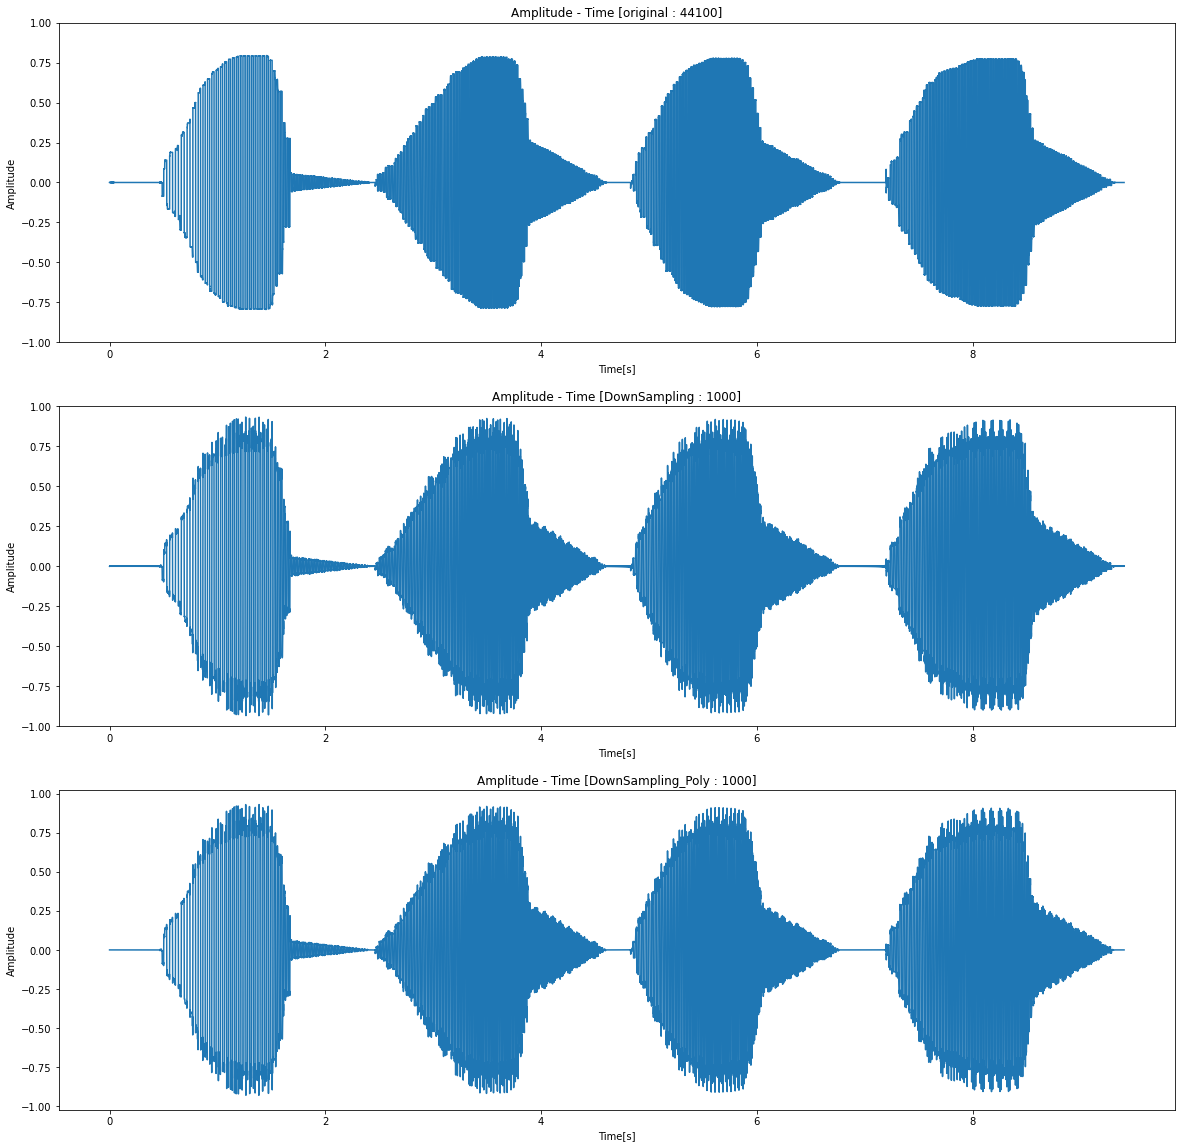

In [14]:
plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
plt.title('Amplitude - Time [original : 44100]')
plt.plot(time, data)
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.ylim([-1,1])

plt.subplot(3,1,2)
plt.title('Amplitude - Time [DownSampling : 1000]')
plt.plot(timeDown, downsampled)
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.ylim([-1,1])

plt.subplot(3,1,3)
plt.title("Amplitude - Time [DownSampling_Poly : 1000]")
plt.plot(timeDown_poly , downsampled_poly )
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")


#plt.savefig('./v-09-10-11-58.png', dpi=100)
#plt.show()

In [15]:
wav_down = r'.\v-09-10-11-58_downsampled.wav'
wavfile.write(wav_down, R, downsampled_poly.astype(np.float32))

In [16]:
import pandas as pd

down_df = pd.DataFrame(downsampled_poly)

down_df

,0
0,3.236615e-05
1,-5.918164e-06
2,2.745989e-06
3,-1.884934e-06
4,8.790488e-07
...,...
9400,9.507637e-07
9401,-1.909717e-06
9402,3.016470e-06
9403,-6.340159e-06


In [17]:
down_df.T.to_csv(r'./v-09-10-11-58_text.txt', index=False, header=None)